# PLN - Modelo de processo de linguagêm natural

**Base de dados foi coletadas pela uma API**

**Análise de sentimento de aplicativos Google Play - Google Play**

![title](imagens/002.JPG)

In [7]:
from platform import python_version

print('Versão Jupyter Notebook neste projeto:', python_version())

Versão Jupyter Notebook neste projeto: 3.7.11


In [9]:
#Importação das bibliotecas

import nltk
import re
import wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
from wordcloud import WordCloud

In [10]:
import warnings

warnings.filterwarnings("ignore")

In [11]:
# Verficações da versões das bibliotecas

%reload_ext watermark

%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

re        : 2.2.1
numpy     : 1.19.5
IPython   : 5.5.0
seaborn   : 0.11.1
wordcloud : 1.5.0
nltk      : 3.2.5
matplotlib: 3.2.2
pandas    : 1.1.5



In [12]:
# Configuração fundo dos gráficos e estilo, tamanho da fonte

sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
color = sns.color_palette()

**Base de dados**

In [13]:
df = pd.read_csv("googleplaystore_user_reviews.csv")
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [14]:
# Exebindo o 5 primeiro dados 

df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [15]:
# Exebindo o 5 últimos dados

df.tail(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


# Data exploration

In [16]:
# Número de linhas e colunas 

df.shape

(64295, 5)

In [17]:
# Informando as informações e das variaveis 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [18]:
# Exibido os tipos de dados

df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [19]:
# Total de colunas e linhas 

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 64295
Columns: 5


In [20]:
# Exibindo valores ausentes e Valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   107457

Unique values :  
 App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         6195
Sentiment_Subjectivity     4530
dtype: int64


# Análise de dados

In [21]:
# Polaridade do coluna 

df.Sentiment_Subjectivity

0        0.533333
1        0.288462
2             NaN
3        0.875000
4        0.300000
           ...   
64290         NaN
64291         NaN
64292         NaN
64293         NaN
64294         NaN
Name: Sentiment_Subjectivity, Length: 64295, dtype: float64

In [22]:
# Contando números de dados

df.Sentiment 

0        Positive
1        Positive
2             NaN
3        Positive
4        Positive
           ...   
64290         NaN
64291         NaN
64292         NaN
64293         NaN
64294         NaN
Name: Sentiment, Length: 64295, dtype: object

In [23]:
# Contando números de dados

df.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [24]:
df.Sentiment_Polarity.value_counts()

 0.000000    5163
 0.500000    1526
 0.700000     991
 1.000000     959
 0.200000     669
             ... 
-0.006667       1
 0.090545       1
 0.166349       1
-0.244141       1
-0.043132       1
Name: Sentiment_Polarity, Length: 6195, dtype: int64

In [25]:
# Contando números de dados

df.Sentiment_Subjectivity.value_counts()

0.000000    4416
1.000000    1749
0.500000    1655
0.600000    1166
0.750000    1140
            ... 
0.677500       1
0.464444       1
0.383000       1
0.400625       1
0.523611       1
Name: Sentiment_Subjectivity, Length: 4530, dtype: int64

In [26]:
corr = df.corr()
corr

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261651
Sentiment_Subjectivity,0.261651,1.000000


In [27]:
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [28]:
# Contagem de dados da coluna account_length

df.groupby(['Sentiment_Polarity'])['Sentiment_Subjectivity'].count()

Sentiment_Polarity
-1.000000    234
-0.988281      2
-0.976562      1
-0.955000      1
-0.937500      5
            ... 
 0.975000      1
 0.976562     24
 0.988281      2
 0.992188      2
 1.000000    959
Name: Sentiment_Subjectivity, Length: 6195, dtype: int64

In [29]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = df.corr()
corr

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261651
Sentiment_Subjectivity,0.261651,1.000000


In [30]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


(2.5, -0.5)

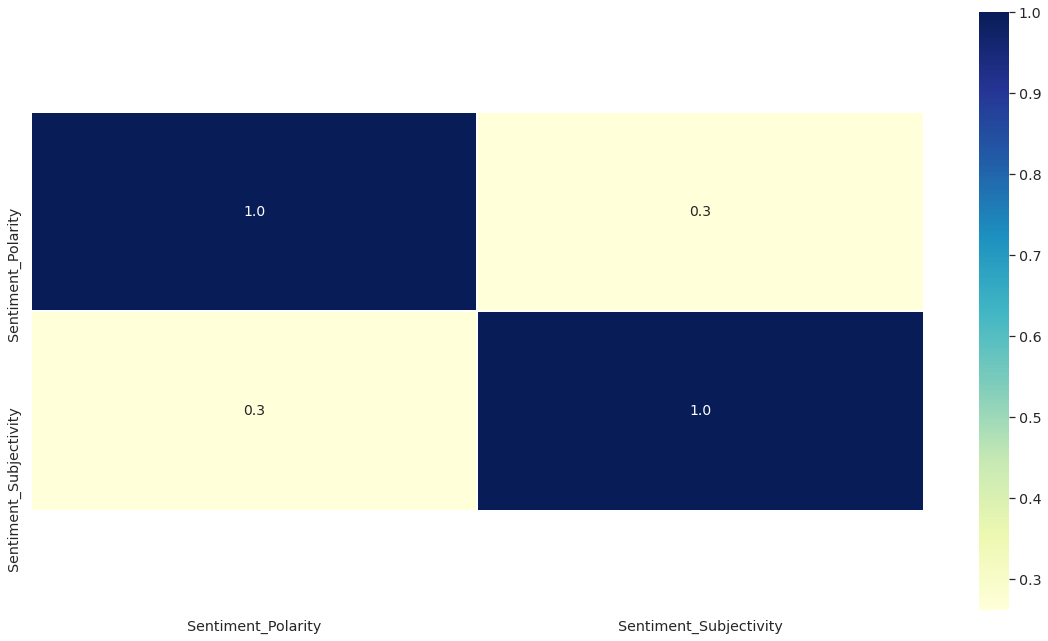

In [31]:
plt.figure(figsize=(20,11))

ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=.5, annot_kws={'size':14} ,fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

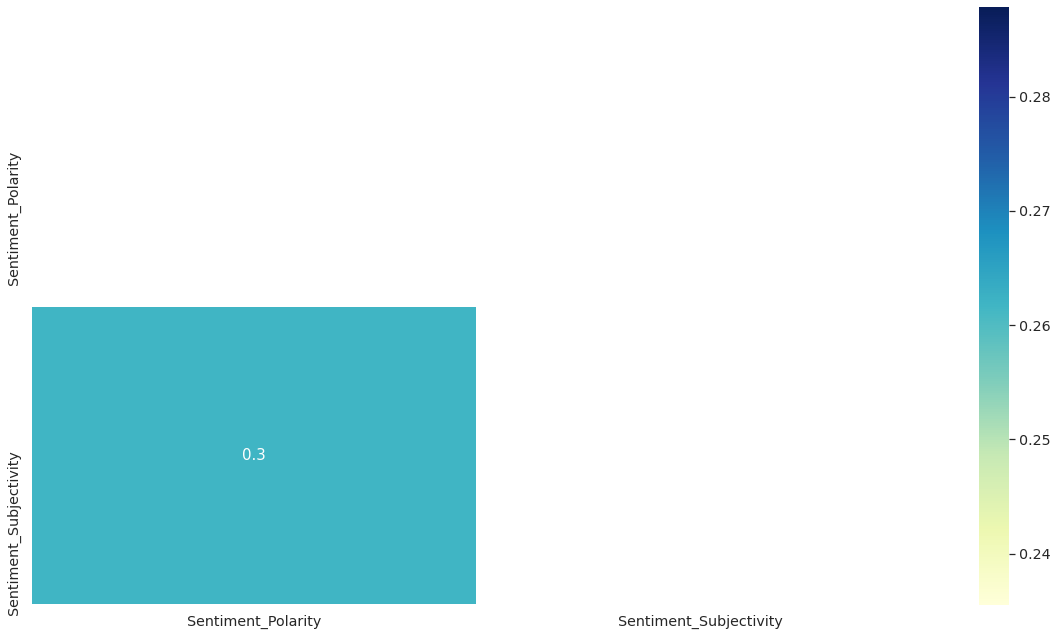

In [32]:
plt.figure(figsize=(20,11))

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, cmap="YlGnBu", linewidths=.5, annot_kws={'size':15} ,fmt=".1f")
plt.show()

# Análise de dados

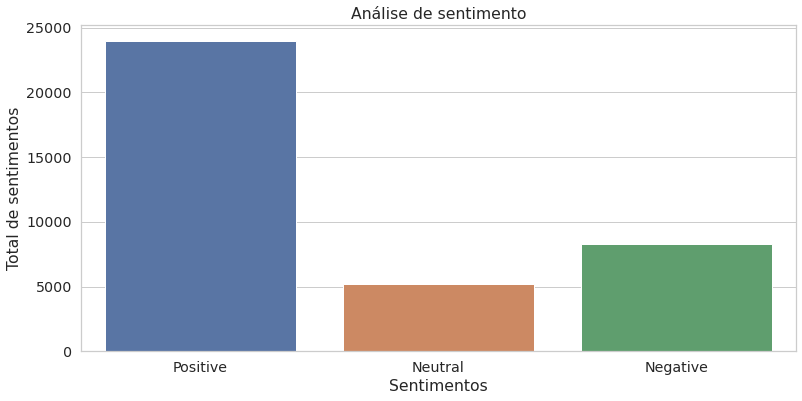

In [33]:
plt.figure(figsize=(12.8,6))

ax = sns.countplot(df["Sentiment"])
plt.title("Análise de sentimento")
plt.xlabel("Sentimentos")
plt.ylabel("Total de sentimentos")
plt.show()

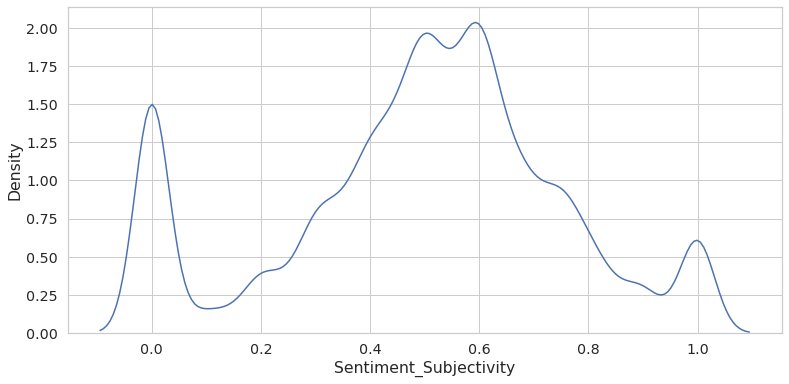

In [34]:
plt.figure(figsize=(12.8,6))

ax = sns.kdeplot(df["Sentiment_Subjectivity"])

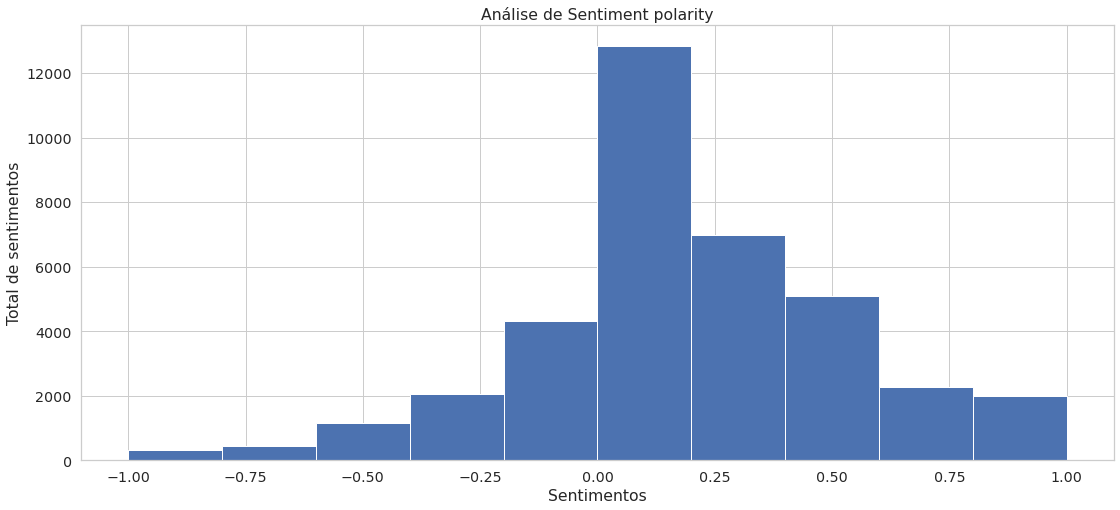

In [35]:
plt.figure(figsize = (18.5, 8))

plt.hist(df["Sentiment_Polarity"]);
plt.title("Análise de Sentiment polarity")
plt.xlabel("Sentimentos")
plt.ylabel("Total de sentimentos")
plt.show()

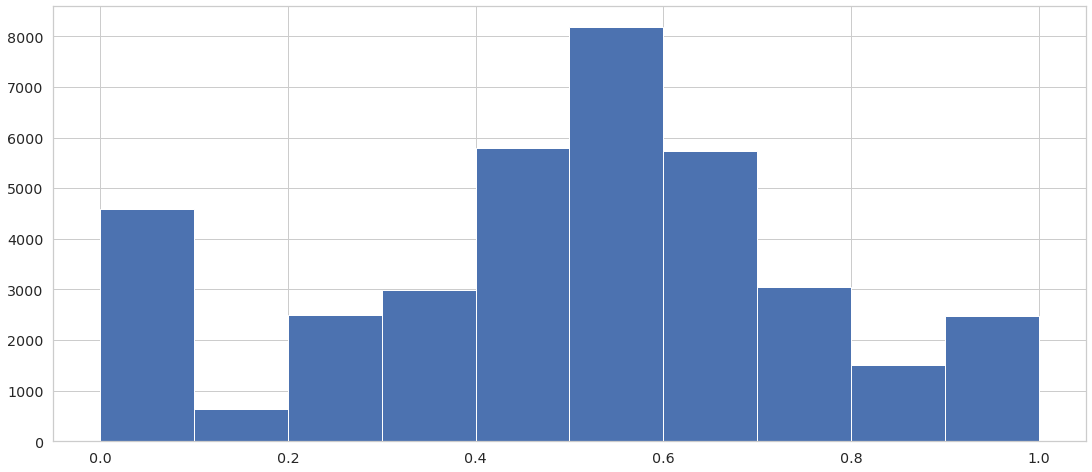

In [36]:
plt.figure(figsize = (18.5, 8))

plt.hist(df["Sentiment_Subjectivity"]);

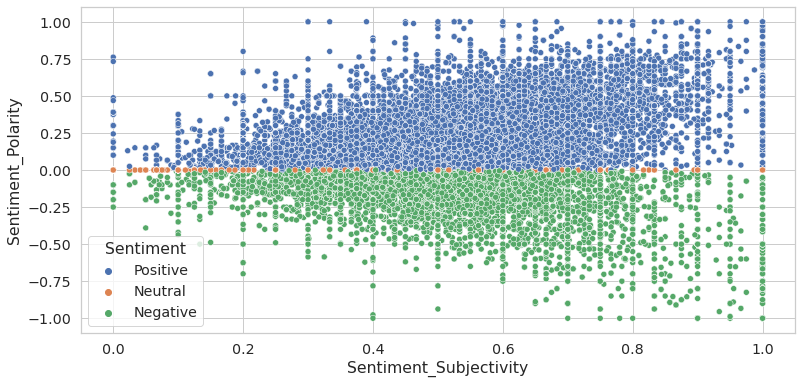

In [37]:
plt.figure(figsize=(12.8,6))

ax = sns.scatterplot(x="Sentiment_Subjectivity", y="Sentiment_Polarity", data=df, hue="Sentiment")

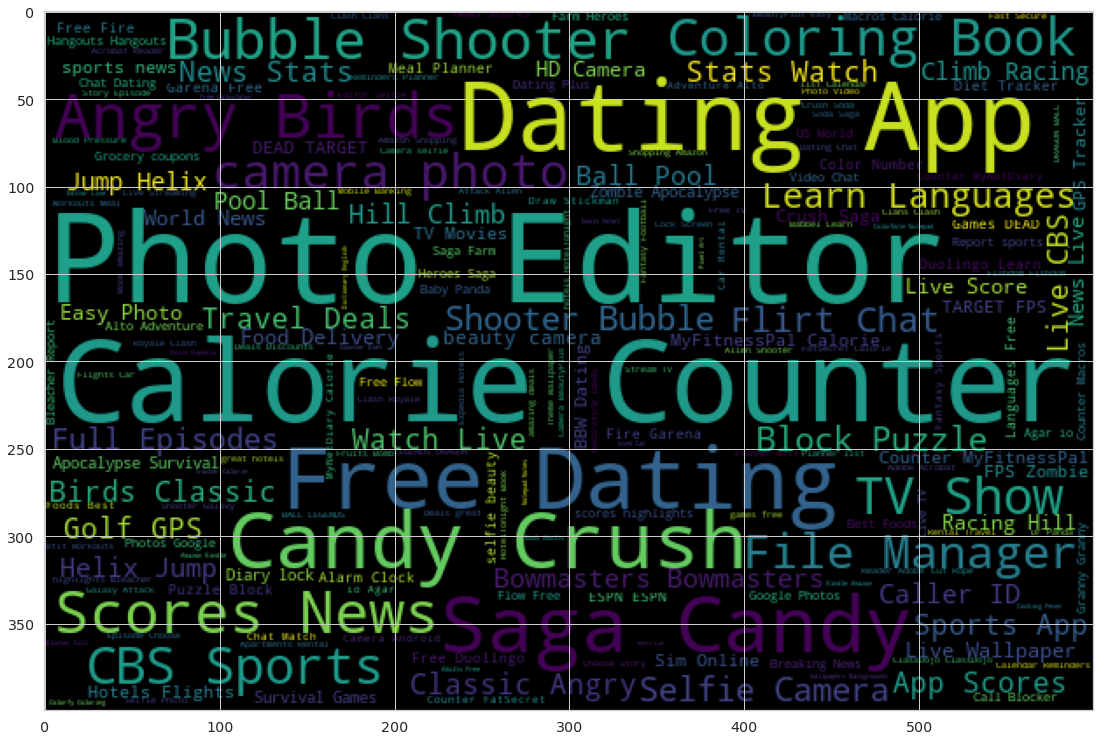

In [38]:
import itertools
from wordcloud import WordCloud

words = ' '.join([tweet for tweet in df['App']])
wordCloud = WordCloud(width=600, height=400).generate(words)
plt.figure(figsize=(18.8, 16))
plt.imshow(wordCloud)
plt.show()

# Pré - processamento dos dados

In [39]:
df = df.dropna()
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [40]:
# Renomeando as colunas do dataset
df.columns = ["Aplicativo", "Text", "Sentimento", "Polaridade", "Subjetividade"]

df.head()

,Aplicativo,Text,Sentimento,Polaridade,Subjetividade
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [41]:
# Excluindo colunas

df.drop(["Aplicativo", "Aplicativo", "Subjetividade"], axis = 1, inplace = True)
df.head()

,Text,Sentimento,Polaridade
0,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,This help eating healthy exercise regular basis,Positive,0.25
3,Works great especially going grocery store,Positive,0.40
4,Best idea us,Positive,1.00
5,Best way,Positive,1.00


In [42]:
# Importação das bibliotecas de nlp

import nltk
import string
import re
import warnings

nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words("english") + list(string.punctuation)
stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Pré - processamento

In [43]:
numerical = []

for i in df.columns:
    if df[i].dtype != 'object':
        numerical.append(i)
        
def data_pre(data):
    df['Numero_words'] = df['Text'].apply(lambda x : len([x for x in x.split()]))
    df['Numero_stopwords'] = df['Text'].apply(lambda x : len([x for x in x.lower().split() if x in stopwords]))
    df['Numero_special_char'] = df['Text'].apply(lambda x : len([x for x in x.split() if x in '[\w\s]']))
    df['Numero_chars'] = df['Text'].apply(lambda x : len(''.join([x for x in x.split()])))
    df['Text'] = df['Text'].apply(lambda x : x.lower())
    df['Text'] = df['Text'].str.replace('[^\w\s]','')
    df['Text'] = df['Text'].apply(lambda x : ' '.join(x for x in x.split() if x not in stopwords))
    df['Text'] = df['Text'].apply(lambda x : ' '.join(x for x in x.split() if x.isdigit()==False))

    return data
df.head()

,Text,Sentimento,Polaridade
0,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,This help eating healthy exercise regular basis,Positive,0.25
3,Works great especially going grocery store,Positive,0.40
4,Best idea us,Positive,1.00
5,Best way,Positive,1.00


In [44]:
from nltk.stem import PorterStemmer

PORTER_STEMMER = PorterStemmer()
df['Text'] = df['Text'].apply(lambda x : ' '.join(PORTER_STEMMER.stem(x) for x in x.split()))
most_common = nltk.FreqDist(' '.join(df['Text']).split()).most_common(2000)
print(most_common)

[('I', 33339), ('game', 7668), ('the', 6408), ('get', 5992), ('like', 5703), ('love', 5219), ('good', 4531), ('It', 4334), ('thi', 4253), ('time', 4226), ('great', 4119), ('use', 3826), ('work', 3447), ('play', 3402), ('would', 3350), ('make', 3232), ('realli', 3000), ('even', 2844), ("it'", 2784), ('need', 2718), ('app.', 2714), ('ad', 2699), ('tri', 2651), ("can't", 2628), ('updat', 2558), ("i'm", 2482), ('want', 2400), ('keep', 2399), ('it.', 2198), ('pleas', 2147), ('go', 2110), ('fix', 2050), ('much', 2026), ('new', 1997), ('easi', 1991), ('mani', 1984), ('give', 1980), ('also', 1941), ('way', 1902), ('everi', 1878), ('help', 1863), ('not', 1839), ('still', 1827), ('phone', 1822), ('and', 1821), ('best', 1815), ("i'v", 1810), ('see', 1769), ('thing', 1747), ('you', 1741), ('veri', 1730), ('but', 1719), ('back', 1654), ('show', 1584), ('add', 1568), ('could', 1550), ('take', 1541), ('nice', 1528), ('say', 1495), ('level', 1475), ('look', 1467), ('pay', 1417), ('thank', 1402), ('bet

# Treino teste

- Treino e teste da base de dados da colunas textos e sentimento

In [45]:
processed_features = df['Text']
labels = df['Sentimento']

In [46]:
# Total de linhas e colunas dados variável processed_features

processed_features.shape

(37427,)

In [47]:
# Total de linhas e colunas dados variável labels

labels.shape

(37427,)

# Dados de limpeza para modelo PLN

**Remove stop words**: Removendo as stop words na base de dados

**Text stemming**: Palavras derivacionalmente relacionadas com significados semelhantes, palavras para retornar documentos que contenham outra palavra no conjunto.

**Dados limpos**: Limpeza na base de dados limpando dados de web com http e outros.

**Lemmatization**: Em linguística é o processo de agrupar as formas flexionadas de uma palavra para que possam ser analisadas como um único item, identificado pelo lema da palavra , ou forma de dicionário.

**Preprocessing**: Pré - processamento da base de dados que serão ser para análise de dados.

In [48]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def remove_stop_words(instancia):
    stopwords = set(nltk.corpus.stopwords.words("english"))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

def text_stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()

    palavras = []

    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

def dados_limpos(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

def Lemmatization(instancia):
    palavras = []
    for w in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(w))
    return (" ".join(palavras))

def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    
    return (" ".join(palavras))

In [49]:
# fidfVectorizer: Converta uma coleção de documentos brutos em uma matriz de recursos do TF-IDF.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_TFIDF = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
vectorizer_TFIDF_features = vectorizer_TFIDF.fit_transform(processed_features).toarray()
vectorizer_TFIDF_features

array([[0.        , 0.        , 0.21172026, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [50]:
processed_features = [Preprocessing(i) for i in processed_features]
processed_features[: 20]

["i like eat delici food that' i'm cook food myself, case 10 best foods help lot, also best befor (shelf life",
 'thi help eat healthi exercis regular basi',
 'work great especi go groceri store',
 'best idea us',
 'best way',
 'amaz',
 'look forward app,',
 'it help site ! it help food get !',
 'good you',
 'use inform the amount spell error question valid inform shared onc fixed, 5 star given',
 'thank you! great app!! add arthritis, eyes, immunity, kidney/liv detox food please',
 'greatest ever complet awesom maintain health thi must ppl there love it!!!',
 'good health good health first priority',
 "health it' import world either life think?",
 'mr sunita bhati i thank developers,to make kind app, realli good healthi food bodi',
 'veri use in diabet age 30 i need control sugar thank',
 'one greatest apps',
 'good nice',
 'healthi realli help',
 'god health']

In [51]:
from nltk.tokenize import word_tokenize

text = "Passei no concurso"

toke = word_tokenize(text)
toke

['Passei', 'no', 'concurso']

In [52]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()
tweet_tokenizer.tokenize(text)

['Passei', 'no', 'concurso']

In [53]:
# Tokenização as palavras precisam ser codificadas como inteiros, 
# ou valores de ponto flutuante, para serem usadas como entradas para modelos machine learning.

from sklearn.feature_extraction.text import CountVectorizer

vetor = CountVectorizer(analyzer = "word", tokenizer = tweet_tokenizer.tokenize)
vetor_train = vetor.fit_transform(processed_features)
vetor_train.shape

(37427, 21973)

# Modelo - 1 Regressão logistica

In [54]:
# Modelo de regressão logistica 
from sklearn.linear_model import LogisticRegression

modelo_regression_logistic = LogisticRegression()
modelo_regression_logistic_fit = modelo_regression_logistic.fit(vetor_train, labels)
modelo_regression_logistic_score = modelo_regression_logistic.score(vetor_train, labels)

print("Model - Logistic Regression: %.2f" % (modelo_regression_logistic_score * 100))

Model - Logistic Regression: 97.64


In [55]:
# Previsão modelo com função predict de previsã das frases

modelo_regression_logistic_pred = modelo_regression_logistic.predict(vetor_train)
modelo_regression_logistic_pred

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Positive',
       'Negative'], dtype=object)

In [56]:
# Previsão modelo com função log_proba de probabilidades das frases

modelo_regression_logistic_log_pred = modelo_regression_logistic.predict_log_proba(vetor_train)
modelo_regression_logistic_log_pred

array([[-1.72324260e+01, -1.46259125e+01, -4.77492896e-07],
       [-5.22536631e+00, -2.67863198e+00, -7.69192780e-02],
       [-7.29783368e+00, -3.65814492e+00, -2.68135895e-02],
       ...,
       [-8.70046259e-02, -3.16705700e+00, -3.18932313e+00],
       [-3.63000475e+00, -2.08022713e+00, -1.64188439e-01],
       [-8.41298221e-03, -4.95407067e+00, -6.62780894e+00]])

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(labels, modelo_regression_logistic_pred))

              precision    recall  f1-score   support

    Negative       0.98      0.96      0.97      8271
     Neutral       0.95      0.96      0.95      5158
    Positive       0.98      0.99      0.98     23998

    accuracy                           0.98     37427
   macro avg       0.97      0.97      0.97     37427
weighted avg       0.98      0.98      0.98     37427



In [58]:
from sklearn import metrics
accuracy_regressao_logistica = metrics.accuracy_score(labels, modelo_regression_logistic_pred)

print("Accuracy model Logistic Regression: %.2f" % (accuracy_regressao_logistica * 100))

Accuracy model Logistic Regression: 97.64


In [59]:
matrix_1 = confusion_matrix(labels, modelo_regression_logistic_pred)
matrix_1

array([[ 7919,    92,   260],
       [   50,  4936,   172],
       [  152,   159, 23687]])

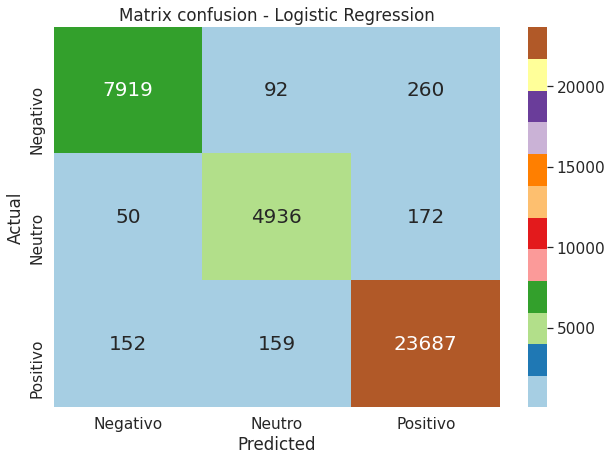

In [60]:
x = ["Negativo", "Neutro", "Positivo"]
y = ['Negativo', "Neutro", "Positivo"]

matrix = pd.DataFrame(matrix_1, columns=np.unique(y), index = np.unique(x))
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title("Matrix confusion - Logistic Regression")
matrix = sns.heatmap(matrix, cmap = 'Paired', annot=True, annot_kws = {"size": 20}, fmt = "")

In [61]:
sentimento=['Positivo',
            'Negativo',
            'Neutro']

print("Classificação de sentimento do modelo de regressão logistica")
print("\n")
print(pd.crosstab(labels, modelo_regression_logistic_pred, rownames = ["Real"], colnames=["Predito"], margins = True))

Classificação de sentimento do modelo de regressão logistica


Predito   Negative  Neutral  Positive    All
Real                                        
Negative      7919       92       260   8271
Neutral         50     4936       172   5158
Positive       152      159     23687  23998
All           8121     5187     24119  37427


In [62]:
from sklearn import svm
from sklearn.pipeline import Pipeline

def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    
    resultado = []
    palavras = texto.split()
    
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    
    return (" ".join(resultado))

model_reg_log = Pipeline([
    ('counts', CountVectorizer()),
    ('classifier', LogisticRegression())
])
model_reg_log.fit(processed_features, labels)

model_reg_log_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', LogisticRegression())
])
model_reg_log_simples.fit(processed_features, labels)

model_reg_log_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', LogisticRegression())
])

model_reg_log_negacoes.fit(processed_features, labels)

Pipeline(memory=None,
         steps=[('counts',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function <lambda> at 0x7f0067739950>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                    

In [63]:
from sklearn.model_selection import cross_val_predict

validacao_cruzada = cross_val_predict(model_reg_log, processed_features, labels)
validacao_cruzada

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Positive',
       'Negative'], dtype=object)

In [64]:
accuracy = metrics.accuracy_score(labels, validacao_cruzada)

print("Acuracia modelo validação cruzada regressão logistica : %.2f" % (accuracy * 100))

Acuracia modelo validação cruzada regressão logistica : 88.83


In [65]:
matrix_2 = confusion_matrix(validacao_cruzada, labels)
matrix_2

array([[ 6420,   256,  1069],
       [  542,  4453,   554],
       [ 1309,   449, 22375]])

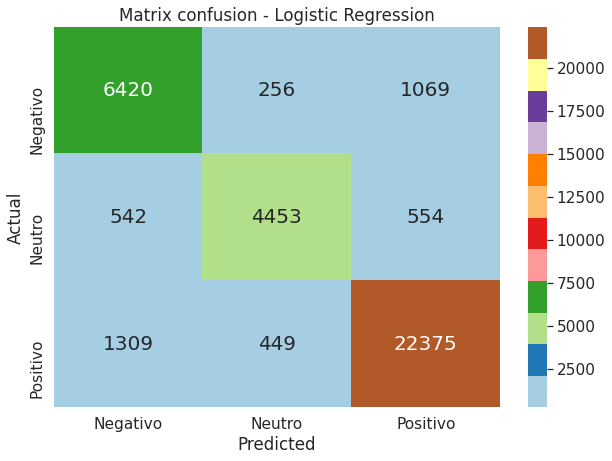

In [66]:
x = ["Negativo", "Neutro", "Positivo"]
y = ['Negativo', "Neutro", "Positivo"]

matrix = pd.DataFrame(matrix_2, columns=np.unique(y), index = np.unique(x))
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title("Matrix confusion - Logistic Regression")
matrix = sns.heatmap(matrix, cmap = 'Paired', annot=True, annot_kws = {"size": 20}, fmt = "")

In [67]:
# Regressão logistica - Modelo

sentimento=['Positivo',
            'Negativo',
            'Neutro']
            
print("Classificação de sentimento do modelo de validacao cruzada - regressão logistica")
print("\n")
print(pd.crosstab(labels, validacao_cruzada, rownames = ["Real"], colnames=["Predito"], margins = True))

Classificação de sentimento do modelo de validacao cruzada - regressão logistica


Predito   Negative  Neutral  Positive    All
Real                                        
Negative      6420      542      1309   8271
Neutral        256     4453       449   5158
Positive      1069      554     22375  23998
All           7745     5549     24133  37427


In [68]:
def metricas_pipeline(model_logistic, train, test):
    validacao_cruzada_Reg = cross_val_predict(model_logistic, train, test, cv = 10)
    return "Acurácia do modelo: {}".format(metrics.accuracy_score(validacao_cruzada_Reg, test))

print("Model pipeline Simples:", metricas_pipeline(model_reg_log, processed_features, labels))
print("Model pipeline negações:", metricas_pipeline(model_reg_log_simples, processed_features, labels))
print("Model pipeline SVM simples:", metricas_pipeline(model_reg_log_negacoes, processed_features, labels))

Model pipeline Simples: Acurácia do modelo: 0.8940604376519625
Model pipeline negações: Acurácia do modelo: 0.8940604376519625
Model pipeline SVM simples: Acurácia do modelo: 0.6387634595345606


# Modelo - 2 Naive bayes

In [69]:
# Modelo machine learning - Naive bayes

from sklearn.naive_bayes import MultinomialNB

modelo_naive_bayes = MultinomialNB()
modelo_naive_bayes_fit = modelo_naive_bayes.fit(vetor_train, labels)
modelo_naive_bayes_score = modelo_naive_bayes.score(vetor_train, labels)

print("Model - Naive Bayes: %.2f" % (modelo_naive_bayes_score * 100))

Model - Naive Bayes: 84.09


In [70]:
# Previsão modelo com função predict de previsã das frases
model_naive_bayes_pred = modelo_naive_bayes.predict(vetor_train)
model_naive_bayes_pred

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Positive',
       'Negative'], dtype='<U8')

In [71]:
# Previsão modelo com função log_proba de probabilidades das frases
model_naive_bayes_prob = modelo_naive_bayes.predict_proba(vetor_train).round(2)

print(model_naive_bayes_prob)

[[0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 ...
 [0.62 0.05 0.33]
 [0.04 0.02 0.94]
 [0.98 0.01 0.  ]]


In [72]:
matrix_3 = confusion_matrix(labels, model_naive_bayes_pred)
matrix_3

array([[ 6591,    68,  1612],
       [  521,  2122,  2515],
       [ 1078,   162, 22758]])

In [73]:
accuracy_naive_bayes = metrics.accuracy_score(labels, model_naive_bayes_pred)

print("Acuracia modelo Naive bayes : %.2f" % (accuracy_naive_bayes * 100))

Acuracia modelo Naive bayes : 84.09


In [74]:
sentimento=['Positivo',
            'Negativo',
            'Neutro']

print("Classificação de sentimento do modelo de Naive bayes")
print("\n")
print(pd.crosstab(labels, model_naive_bayes_pred, rownames = ["Real"], colnames=["Predito"], margins = True))

Classificação de sentimento do modelo de Naive bayes


Predito   Negative  Neutral  Positive    All
Real                                        
Negative      6591       68      1612   8271
Neutral        521     2122      2515   5158
Positive      1078      162     22758  23998
All           8190     2352     26885  37427


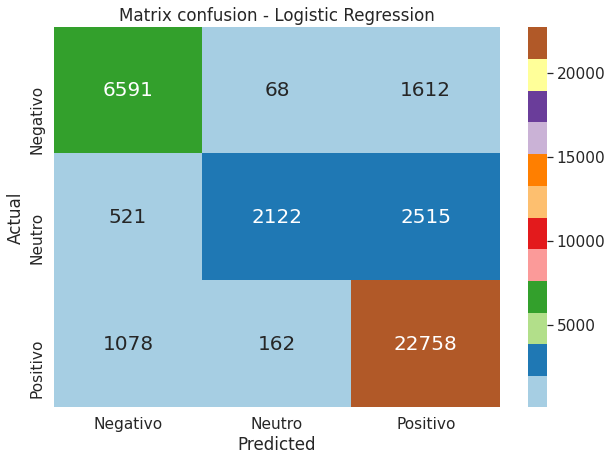

In [75]:
x = ["Negativo", "Neutro", "Positivo"]
y = ['Negativo', "Neutro", "Positivo"]

matrix = pd.DataFrame(matrix_3, columns=np.unique(y), index = np.unique(x))
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title("Matrix confusion - Logistic Regression")
matrix = sns.heatmap(matrix, cmap = 'Paired', annot=True, annot_kws = {"size": 20}, fmt = "")

In [ ]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    
    resultado = []
    palavras = texto.split()
    
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    
    return (" ".join(resultado))

# Pipeline dos dados para modelo M.L sem acurácia 
model_pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

model_pipeline_simples.fit(processed_features, labels)

model_pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

model_pipeline_negacoes.fit(processed_features, labels)

model_pipeline_svm_simples = Pipeline([
    ("counts", CountVectorizer()),
    ("classifier", svm.SVC(kernel = "linear"))
])

model_pipeline_svm_simples.fit(processed_features, labels)
model_pipeline_svm_negacoes = Pipeline([
    ("counts", CountVectorizer(tokenizer = lambda text: marque_negacao(text))),
    ("classifier", svm.SVC(kernel = "linear"))
])

model_pipeline_svm_negacoes.fit(processed_features, labels)


validacao_cruzada = cross_val_predict(model_pipeline_simples, processed_features, labels)
validacao_cruzada

In [ ]:
accuracy_naive_bayes = metrics.accuracy_score(labels, model_naive_bayes_pred)

print("Acuracia modelo Naive bayes : %.2f" % (accuracy_naive_bayes * 100))

In [ ]:
matrix_3 = confusion_matrix(labels, model_naive_bayes_pred)
matrix_3

In [ ]:
sentimento=['Positivo',
            'Negativo',
            'Neutro']

print("Classificação de sentimento do modelo de Naive bayes")
print("\n")
print(pd.crosstab(labels, model_naive_bayes_pred, rownames = ["Real"], colnames=["Predito"], margins = True))

In [ ]:
x = ["Negativo", "Neutro", "Positivo"]
y = ['Negativo', "Neutro", "Positivo"]

matrix = pd.DataFrame(matrix_3, columns=np.unique(y), index = np.unique(x))
matrix.index.name = 'Actual'
matrix.columns.name = 'Predicted'

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title("Matrix confusion - Logistic Regression")
matrix = sns.heatmap(matrix, cmap = 'Paired', annot=True, annot_kws = {"size": 20}, fmt = "")

In [ ]:
# Matriz de confusão - Naive bayes

sentimento=['Positivo',
            'Negativo',
            'Neutro']

print(pd.crosstab(labels, validacao_cruzada, rownames = ["Real"], colnames=["Predito"], margins = True))

In [ ]:
# Modelo - Naive Nayes

def metricas_pipeline(model_naive_bayes, train, test):
    validacao_cruzada = cross_val_predict(model_naive_bayes, train, test, cv = 10)
    return "Acurácia do modelo: {}".format(metrics.accuracy_score(validacao_cruzada, test))

print("Model pipeline Simples:", metricas_pipeline(model_pipeline_simples, processed_features, labels))
print("Model pipeline negações:", metricas_pipeline(model_pipeline_negacoes, processed_features, labels))
print("Model pipeline SVM simples:", metricas_pipeline(model_pipeline_svm_simples, processed_features, labels))
print("Model pipeline SVM negacoes:", metricas_pipeline(model_pipeline_svm_negacoes, processed_features, labels))